# Weighted ECM clustering
## Toys dataset - 2 clusters, 2 dimensions


In [61]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity, ev_plot_2D, plotting
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, rand_score, normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

          0         1
0  2.947227  3.493348
1  2.589979  3.314163
2  1.156683  2.899786
3  0.373611  2.803841
4  3.390828  2.583229


D:\vtdo\projects\evclust\src\evclust\utils.py:1085: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


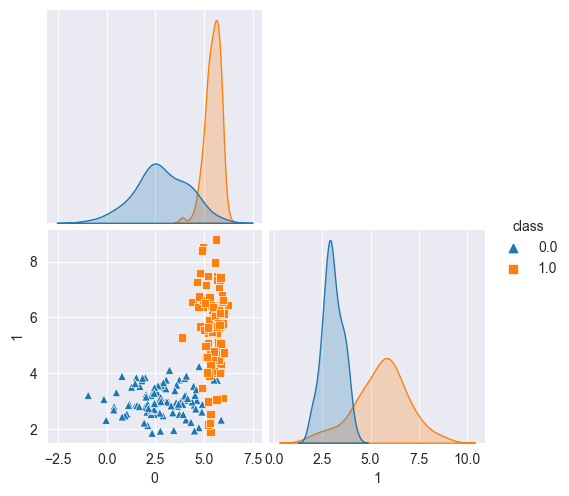

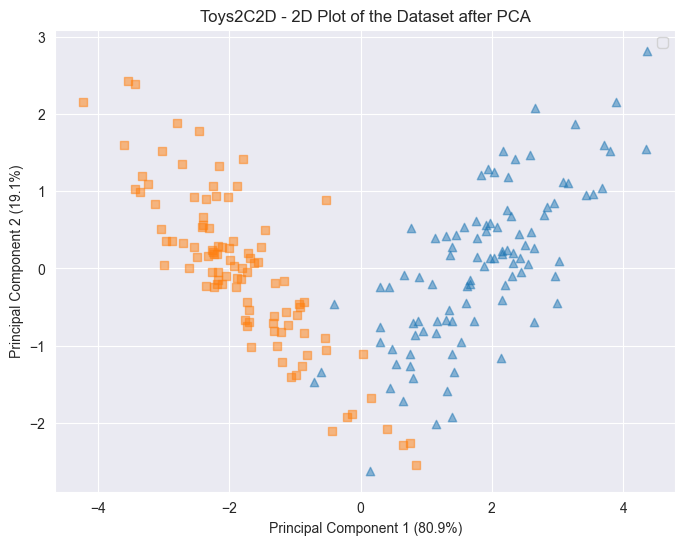

In [62]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c2dDataset.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1])

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C2D", matrix_plot=True, markers=markers)

# Normalization
# scaler = MinMaxScaler((0,1))
# X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [63]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
model_list = np.array([])
for i in range(10):
    model = ecm(x=X, c=2, beta=2, alpha=1, delta=delta, init="kmeans")
    model_list = np.append(model_list, model)
    
model_list = sorted(model_list, key=lambda x : x['crit'])
# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

J values: [183.47535630019817, 183.47535630019817, 183.47535630019817, 183.47535630019817, 183.47535630019817, 183.47535630019817, 183.47535630019817, 183.47535630019817, 183.47535630019817, 183.47535630019817]
ARI values: [0.8448772116343112, 0.8448772116343112, 0.8448772116343112, 0.8448772116343112, 0.8448772116343112, 0.8448772116343112, 0.8448772116343112, 0.8448772116343112, 0.8448772116343112, 0.8448772116343112]
NS values: [0.8122151945290588, 0.8468990352765128, 0.8122151945290588, 0.8122151945290588, 0.8122151945290588, 0.8122151945290588, 0.8468990352765128, 0.8122151945290588, 0.8468990352765128, 0.8468990352765128]
NMI values: [0.7585246718056851, 0.7585246718056851, 0.7585246718056851, 0.7585246718056851, 0.7585246718056851, 0.7585246718056851, 0.7585246718056851, 0.7585246718056851, 0.7585246718056851, 0.7585246718056851]
Average ARI values: 0.8448772116343111
Average Non-specificity: 0.8260887308280405
Average Normalized mutual infor: 0.7585246718056851
Center: [[5.5286

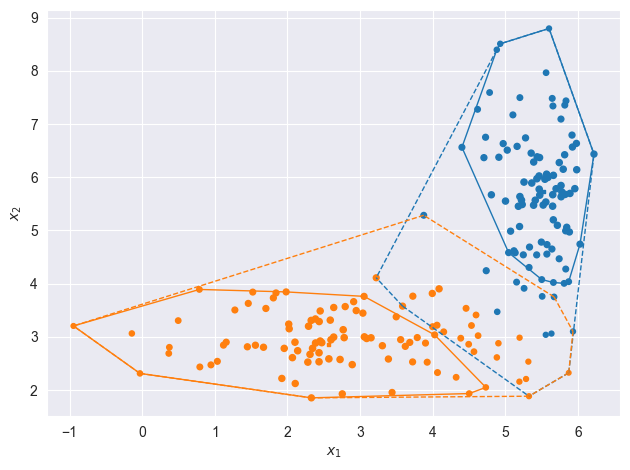

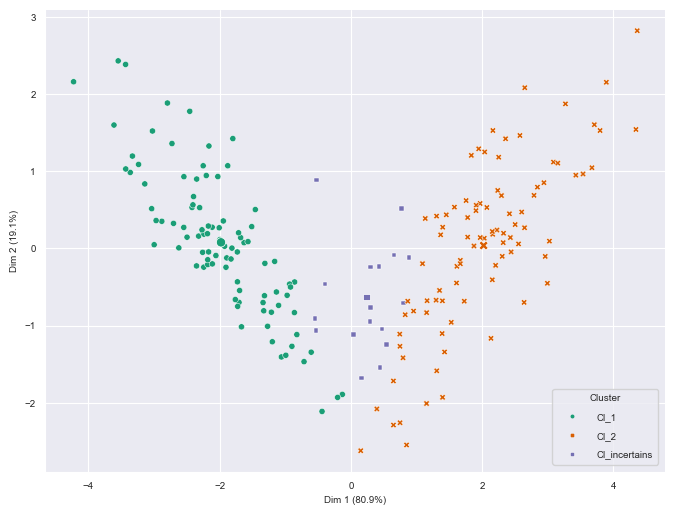

In [64]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")
print(f"Center: {model_list[0]['g']}")
# Plotting the the model with the minimum J value
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

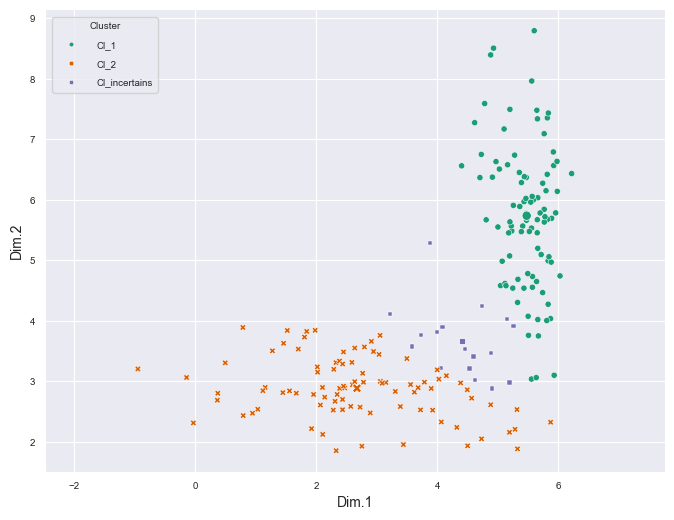

In [65]:
ev_plot_2D(data=dataset[:, :-1], x=model_list[0], normalize=False, cex=20)

## Weighted ECM (WECM)

In [66]:
# %%capture
model_list = np.array([])
c = 2
d = X.shape[1]
delta = np.sqrt(20)
W = np.ones((c, d)) * (1/d)
for i in range(10):
    model = wecm(x=X, c=c, W=W, beta=2, alpha=1, delta=delta, epsi=1e-3, stopping_factor="center", init="kmeans")
    model_list = np.append(model_list, model)
    
model_list = sorted(model_list, key=lambda model: model['crit'])

# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]


Initial weights: 
 [[0.5 0.5]
 [0.5 0.5]]
---------Iteration #1---------
Initial prototypes: 
 [[2.88033069 2.95820469]
 [5.44921707 5.68144983]]
[1, 38.024693215834496]
[2, 24.844252120991815]
[3, 23.959748331237773]
[4, 23.793588527570105]
[5, 23.71011218036827]
[6, 23.651776568319324]
[7, 23.60879880474663]
[8, 23.57293274389006]
[9, 23.536977368535453]
[10, 23.503756835255153]
[11, 23.449400357944164]
[12, 23.394745410104417]
[13, 23.33040625524306]
[14, 23.252540008484555]
[15, 23.163022992693705]
[16, 23.067677913542145]
[17, 22.976158362196088]
[18, 22.89656494129454]
[19, 22.833853809857874]
[20, 22.7876197562517]
[21, 22.755413930283794]
[22, 22.733938628256848]
[23, 22.72010842360941]
[24, 22.71142363464161]
[25, 22.706048233976816]
[26, 22.70276771269756]
[27, 22.70078714127314]
[28, 22.699598898538746]
[29, 22.698886930411998]
[30, 22.69845862624534]
[31, 22.698198517049708]
---------End Iteration #1---------
Initial weights: 
 [[0.5 0.5]
 [0.5 0.5]]
---------Iteration #1--

J values: [22.698198517049708, 22.698198517049708, 22.698198517049708, 22.698198517049708, 22.698198517049708, 22.698198517049715, 22.698198517049715, 22.698198517049715, 22.698198517049715, 22.698198517049715]
ARI values: [0.8635576151967236, 0.8635576151967236, 0.8635576151967236, 0.8635576151967236, 0.8635576151967236, 0.8635576151967236, 0.8635576151967236, 0.8635576151967236, 0.8635576151967236, 0.8635576151967236]
NS values: [0.8776605622099116, 0.8776605622099116, 0.8776605622099116, 0.8776605622099116, 0.8776605622099116, 0.7424284968598509, 0.7424284968598509, 0.7424284968598509, 0.7424284968598509, 0.7424284968598509]
NMI values: [0.7848448052631691, 0.7848448052631691, 0.7848448052631691, 0.7848448052631691, 0.7848448052631691, 0.7848448052631691, 0.7848448052631691, 0.7848448052631691, 0.7848448052631691, 0.7848448052631691]
Average ARI values: 0.8635576151967236
Average Non-specificity: 0.8100445295348813
Average Normalized mutual infor: 0.7848448052631692


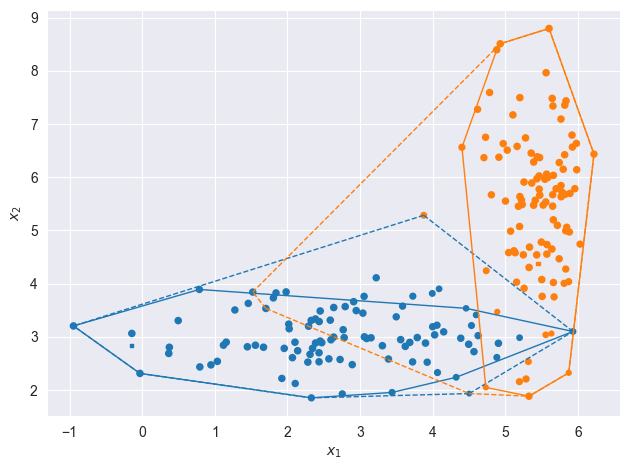

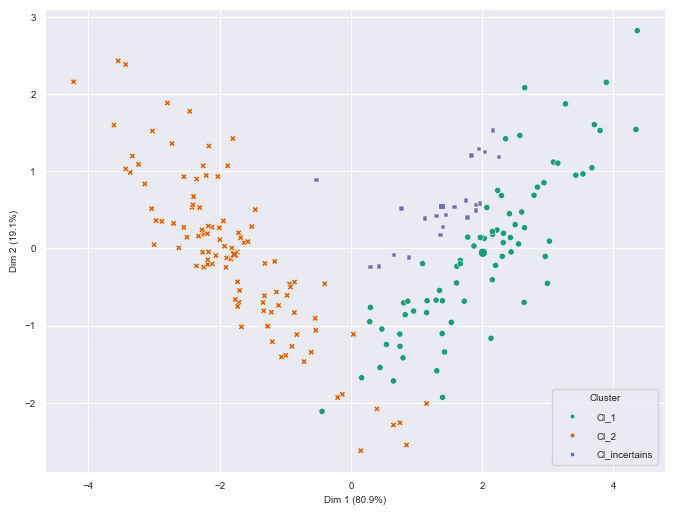

In [67]:
print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")

# Plotting
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

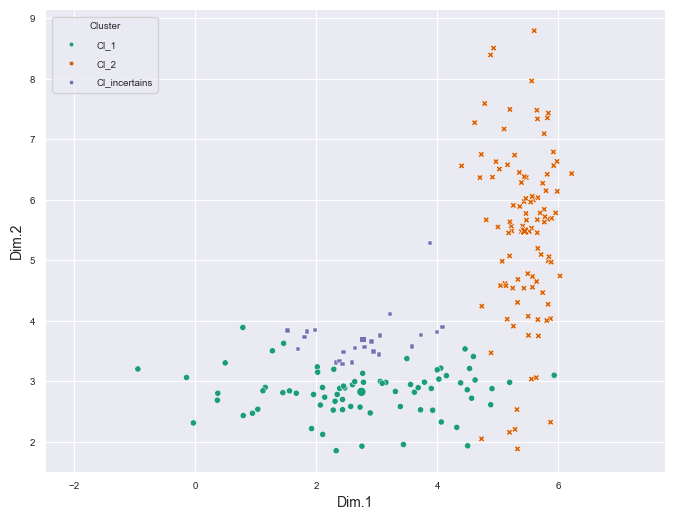

In [68]:
ev_plot_2D(data=dataset[:, :-1], x=model_list[0], normalize=False, cex=20)

In [69]:
top_weights = [model['W'] for model in model_list]
for W in top_weights:
    print(f"\n{W}")


[[0.00924553 0.99075447]
 [0.95695687 0.04304313]]

[[0.00924553 0.99075447]
 [0.95695687 0.04304313]]

[[0.00924553 0.99075447]
 [0.95695687 0.04304313]]

[[0.00924553 0.99075447]
 [0.95695687 0.04304313]]

[[0.00924553 0.99075447]
 [0.95695687 0.04304313]]

[[0.95695687 0.04304313]
 [0.00924553 0.99075447]]

[[0.95695687 0.04304313]
 [0.00924553 0.99075447]]

[[0.95695687 0.04304313]
 [0.00924553 0.99075447]]

[[0.95695687 0.04304313]
 [0.00924553 0.99075447]]

[[0.95695687 0.04304313]
 [0.00924553 0.99075447]]
